In [ ]:
#Korean Dramas Dataset
#Данный датасет содержит информацию о 350 корейских дорамах. Источники: MyDramaList и Kaggle. Характер данных: реальные.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = 'kdrama_DATASET.csv'
data = pd.read_csv(df, encoding='utf-8')

# Просмотр первых нескольких строк данных
print('Dataset loaded successfully. Here are the first few rows:')
data.head()

Dataset loaded successfully. Here are the first few rows:


,Rank,Title,Year of release,Number of Episodes,Rating,Description,Genre,Tags,Actors
0,#1,Move to Heaven,2021,10,9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...","Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju..."
1,#2,Twinkling Watermelon,2023,16,9.2,"In 2023, high school student Eun Gyeol, a CODA...","Romance, Youth, Drama, Fantasy","Time Travel, Child From The Future, Sign Langu...","Ha Eun-Gyeol, Ha Yi-Chan, Choi Se-Kyung, Yoon ..."
2,#3,Moving,2023,20,9.1,"Kim Bong Seok, Jang Hui Su, and Lee Gang Hun, ...","Action, Thriller, Mystery, Supernatural","Graphic Violence, Supernatural Power, Multiple...","Ryu Seung Ryong, Han Hyo Joo, Zo In Sung"
3,#4,The Trauma Code: Heroes on Call,2025,8,9.1,"Baek Gang Hyeok, a genius trauma surgeon with ...","Action, Comedy, Drama, Medical","Surgeon Male Lead, Hospital Setting, Mentor-Me...","Ju Ji Hoon, Choo Young Woo, Ha Young, Yoon Gyu..."
4,#5,Flower of Evil,2020,16,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ..."


In [14]:
#Проверка информации о датасете
data.info()

# Проверка типов данных
print("\nData types:")
print(data.dtypes)

# Среднее значение и стандартное отклонение для числовых столбцов
print("\nThe average value:")
print(data.mean(numeric_only=True))
print("\nStandard deviation:")
print(data.std(numeric_only=True))

# Проверка наличия пропущенных значений
print("\nMissing values per column:")
print(data.isnull().sum())

# Обработка пропущенных значений 
data.fillna({
    'Description': 'No description available',
    'Rating': data['Rating'].mean()
}, inplace=True)


# Отбор только числовых данных
numeric_data = data.select_dtypes(include=['number'])

#Общая статистика
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                350 non-null    object 
 1   Title               350 non-null    object 
 2   Year of release     350 non-null    int64  
 3   Number of Episodes  350 non-null    int64  
 4   Rating              350 non-null    float64
 5   Description         350 non-null    object 
 6   Genre               350 non-null    object 
 7   Tags                350 non-null    object 
 8   Actors              350 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 24.7+ KB

Data types:
Rank                   object
Title                  object
Year of release         int64
Number of Episodes      int64
Rating                float64
Description            object
Genre                  object
Tags                   object
Actors                 object
dtype: obje

,Year of release,Number of Episodes,Rating
count,350.000000,350.000000,350.000000
mean,2019.808571,18.254286,8.364857
std,3.713282,14.565962,0.454704
min,2003.000000,1.000000,6.400000
25%,2018.000000,12.000000,8.300000
50%,2020.000000,16.000000,8.400000
75%,2023.000000,16.000000,8.600000
max,2025.000000,133.000000,9.200000


C:\Users\leopa\AppData\Local\Temp\ipykernel_10512\1464895437.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


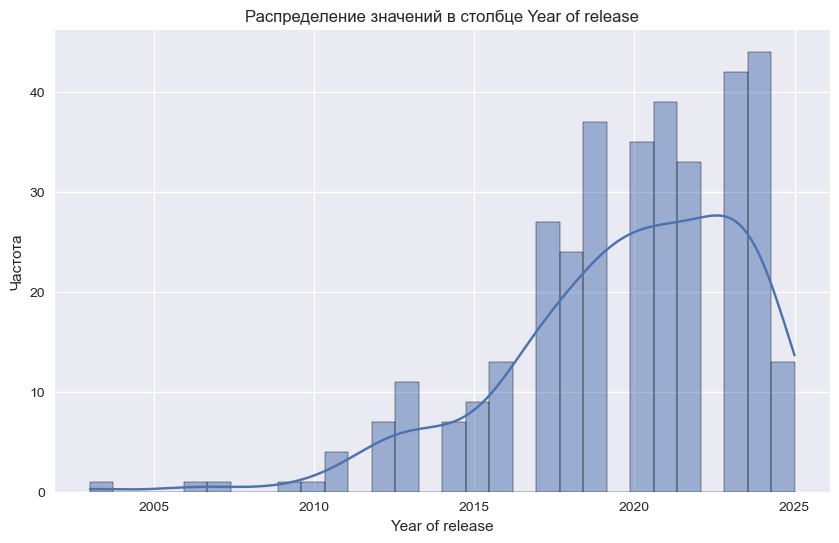

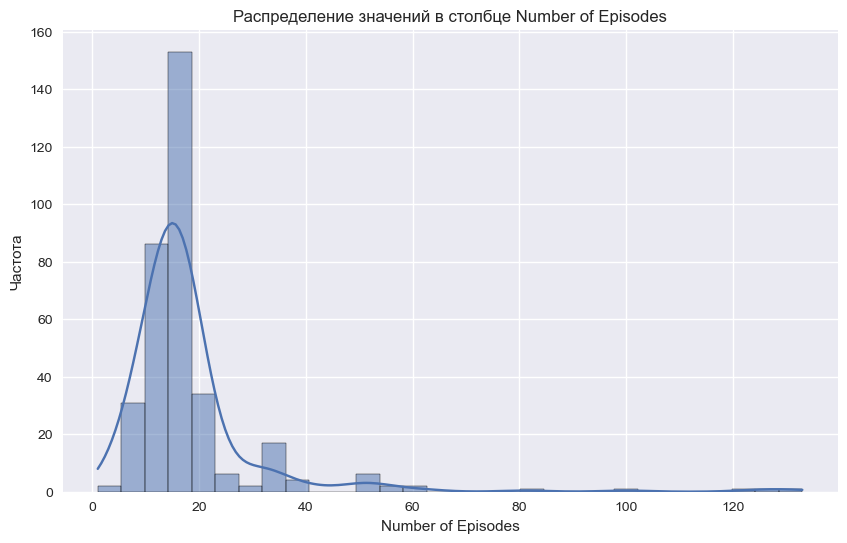

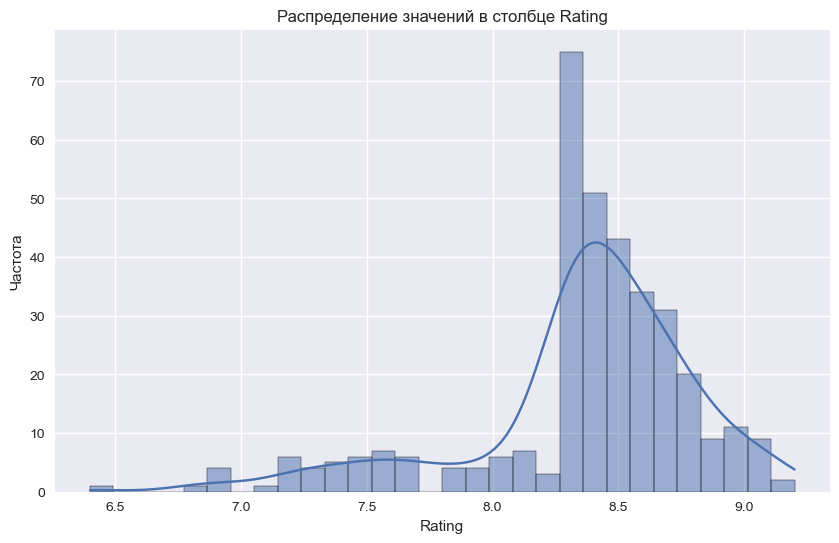

Выбросы в столбце Year of release:
84     2003
227    2006
266    2007
Name: Year of release, dtype: int64
--------------------------------------------------
Выбросы в столбце Number of Episodes:
100    100
135     62
227     81
229    133
323    128
348    124
Name: Number of Episodes, dtype: int64
--------------------------------------------------
Выбросы в столбце Rating:
344    6.9
345    6.9
346    6.9
347    6.9
348    6.8
349    6.4
Name: Rating, dtype: float64
--------------------------------------------------


In [15]:
# Настройка стиля графиков
plt.style.use('seaborn')

# Построение гистограммы для всех числовых столбцов
numeric_cols = data.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Распределение значений в столбце {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

# Определение выбросов
for col in numeric_cols:
    mean = data[col].mean()
    std = data[col].std()
    outliers = data[(data[col] < mean - 3*std) | (data[col] > mean + 3*std)]
    print(f'Выбросы в столбце {col}:')
    print(outliers[col])
    print('-'*50)

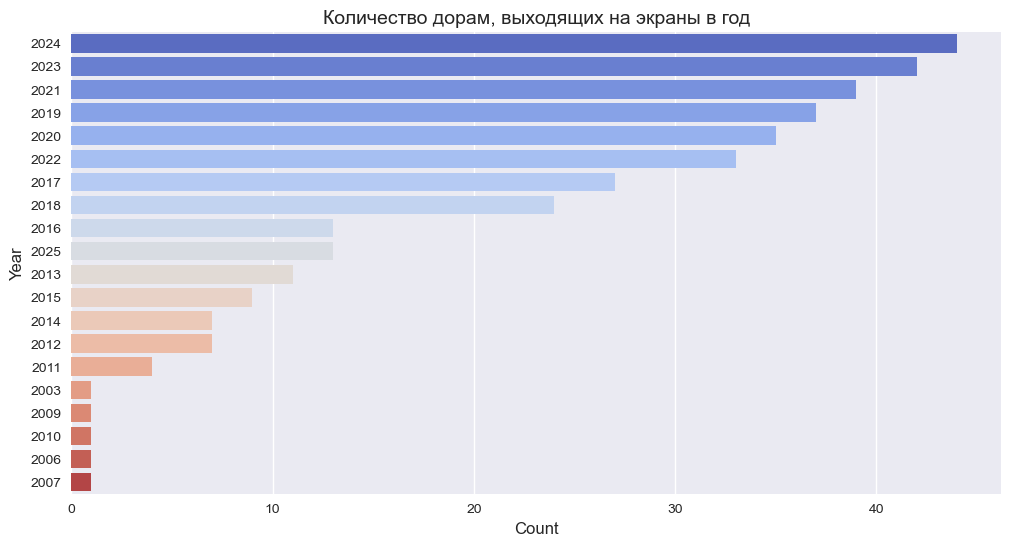

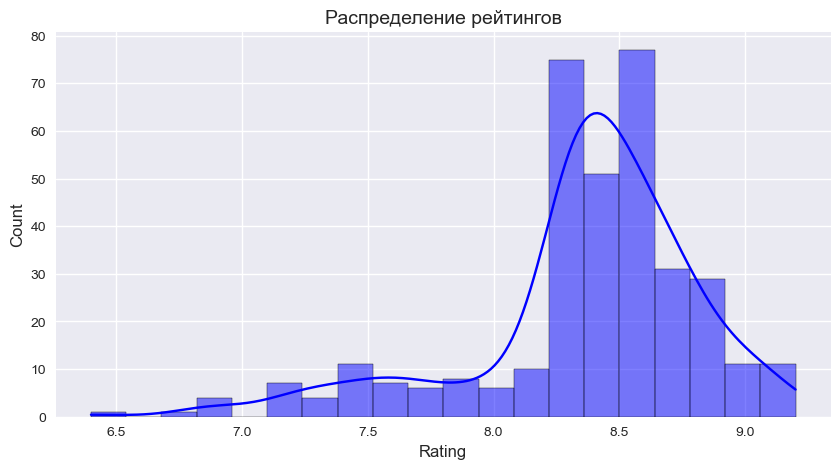

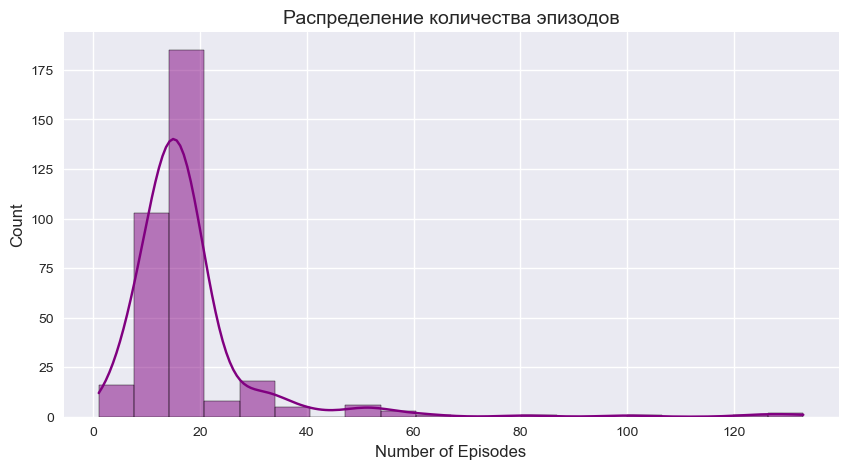

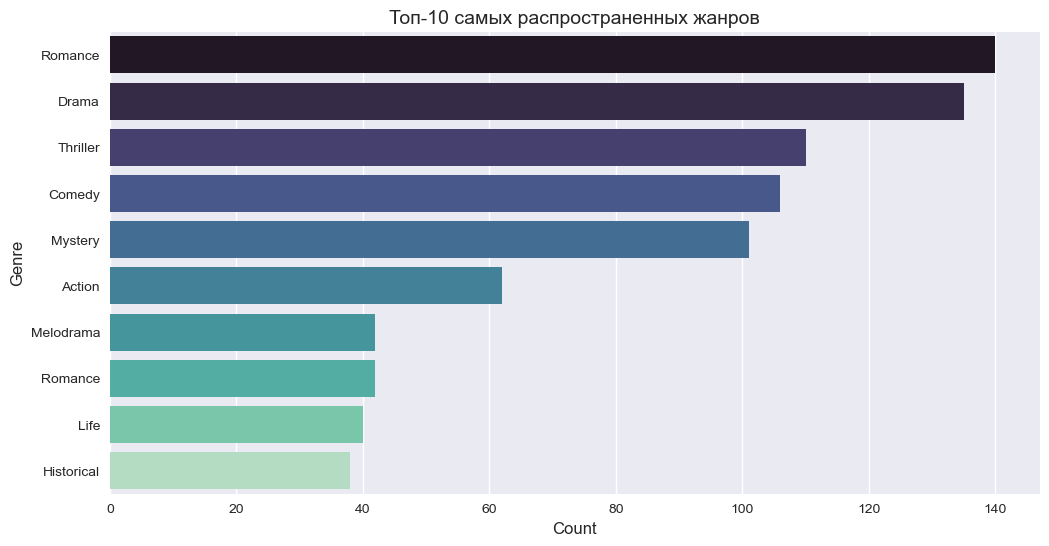

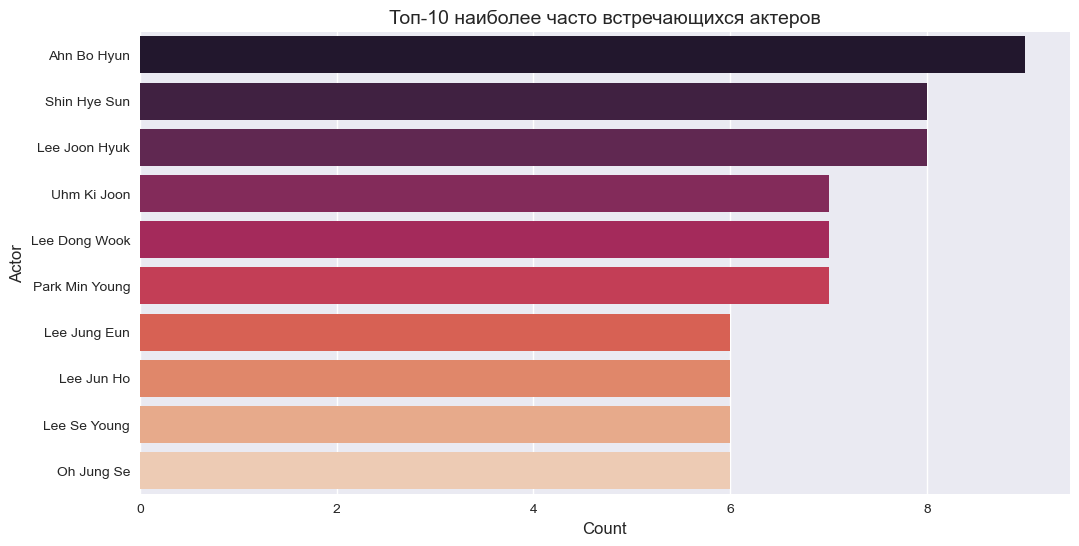

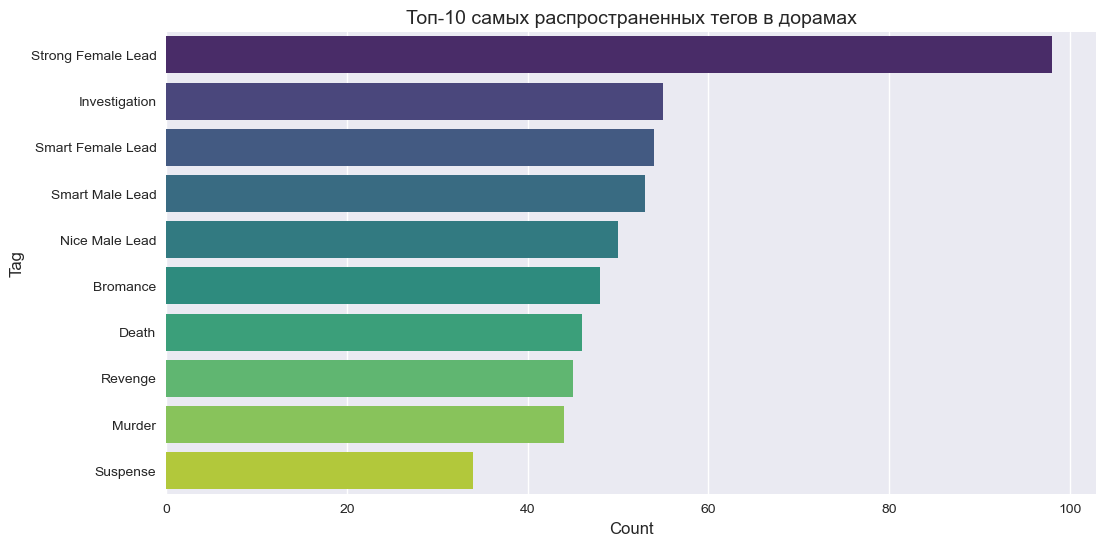

In [26]:
#Количество дорам, выходящих на экраны в год

plt.figure(figsize=(12,6))
sns.countplot(y=data['Year of release'], order=data['Year of release'].value_counts().index, palette="coolwarm")
plt.title("Количество дорам, выходящих на экраны в год", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.show()

#Распределение рейтингов
plt.figure(figsize=(10,5))
sns.histplot(data['Rating'], bins=20, kde=True, color="blue")
plt.title("Распределение рейтингов", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

#Распределение количества эпизодов

plt.figure(figsize=(10,5))
sns.histplot(data['Number of Episodes'], bins=20, kde=True, color="purple")
plt.title("Распределение количества эпизодов", fontsize=14)
plt.xlabel("Number of Episodes", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

#Наиболее распространенные жанры
genre_counts = data['Genre'].str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="mako")
plt.title("Топ-10 самых распространенных жанров", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.show()

#Наиболее часто встречающиеся актеры
actor_counts = data['Actors'].str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=actor_counts.values, y=actor_counts.index, palette="rocket")
plt.title("Топ-10 наиболее часто встречающихся актеров", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Actor", fontsize=12)
plt.show()

#Наиболее распространенные теги
tag_counts = data['Tags'].str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=tag_counts.values, y=tag_counts.index, palette="viridis")
plt.title("Топ-10 самых распространенных тегов в дорамах", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Tag", fontsize=12)
plt.show()

                    Year of release  Number of Episodes    Rating
Year of release            1.000000           -0.276955 -0.347643
Number of Episodes        -0.276955            1.000000 -0.075091
Rating                    -0.347643           -0.075091  1.000000


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


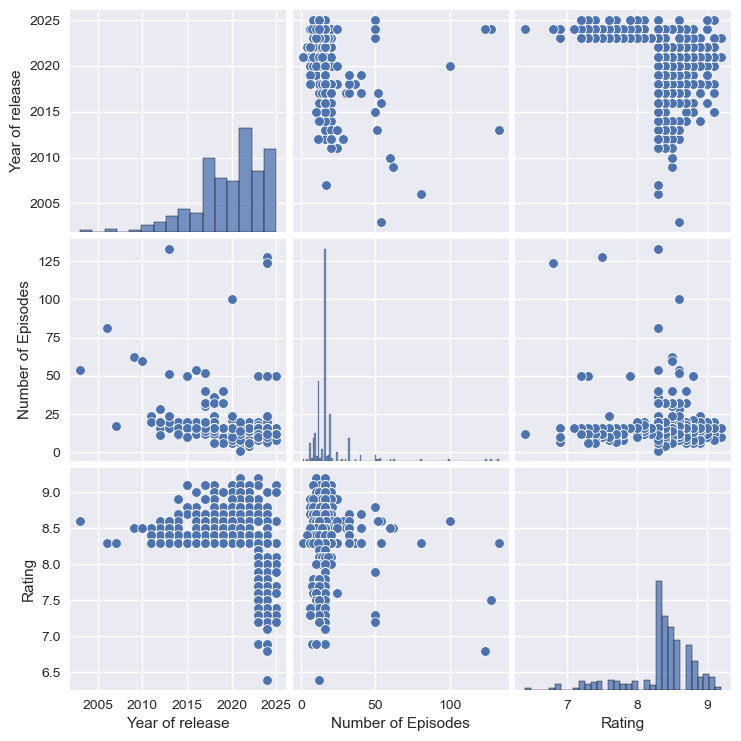

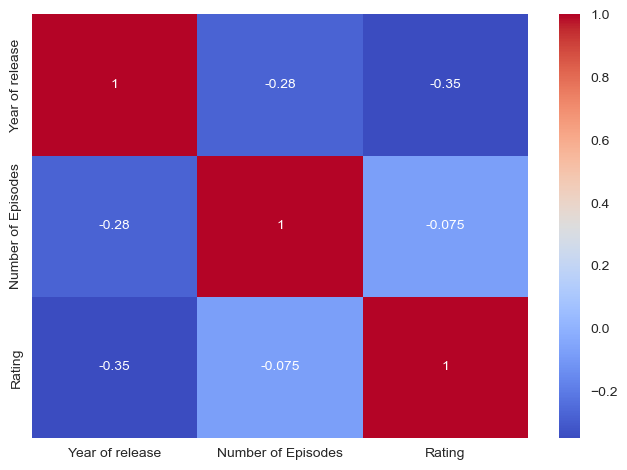

In [16]:
# Корреляция
corr_matrix = numeric_data.corr()
print(corr_matrix)

# Матрица графиков рассеивания
sns.pairplot(numeric_data)
plt.show()

# Тепловая карта корреляции
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()